# Bitcoin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Preprocessing

In [ ]:
# bitcoin = pd.read_csv('bitcoin_original.csv')
# bitcoin = bitcoin.drop(columns=['Unnamed: 0'])
# for name in bitcoin.columns[1:-2]:
#     bitcoin[name] = bitcoin[name].str.replace(',', '').astype(float)
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# bitcoin = bitcoin.sort_values('Date')
# bitcoin['Average'] = (bitcoin['High'] + bitcoin['Low']) / 2
# bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# bitcoin.head()

,Unnamed: 0,Date,Price,Open,High,Low,Vol.,Change %
0,0,01/01/2025,"94,560.2","93,557.3","95,100.0","92,939.3",43.34K,1.07%
1,1,12/31/2024,"93,557.2","92,777.2","96,163.4","92,036.2",74.85K,0.84%
2,2,12/30/2024,"92,779.8","93,718.7","94,936.4","91,522.3",112.43K,-1.00%
3,3,12/29/2024,"93,716.3","95,282.6","95,315.4","93,026.7",47.71K,-1.65%
4,4,12/28/2024,"95,284.5","94,274.9","95,684.3","94,124.7",32.97K,1.07%
...,...,...,...,...,...,...,...,...
5277,2355,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
5278,2356,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
5279,2357,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
5280,2358,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%


In [13]:
bitcoin_data = pd.read_csv("data/attachments/bitcoin_preprocessed.csv", index_col="Date", parse_dates=["Date"])
bitcoin_data.head()

,Price,Open,High,Low,Vol.,Change %,Average
Date,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%,0.1
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%,0.1
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%,0.1
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%,0.1
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%,0.1


In [14]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2010-07-18 to 2025-01-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     5282 non-null   float64
 1   Open      5282 non-null   float64
 2   High      5282 non-null   float64
 3   Low       5282 non-null   float64
 4   Vol.      5276 non-null   object 
 5   Change %  5282 non-null   object 
 6   Average   5282 non-null   float64
dtypes: float64(5), object(2)
memory usage: 330.1+ KB


In [15]:
bitcoin_data.describe()

,Price,Open,High,Low,Average
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,13991.793601,13973.960621,14301.911473,13630.541746,13966.226609
std,20663.596560,20634.796513,21096.208461,20162.686270,20626.123003
min,0.100000,0.000000,0.100000,0.000000,0.050000
25%,236.325000,236.225000,240.300000,232.325000,236.250000
50%,3694.250000,3688.400000,3826.400000,3611.800000,3727.825000
75%,20759.675000,20725.975000,21307.025000,20256.025000,20796.437500
max,106138.900000,106140.700000,108244.900000,105350.600000,106797.750000


Checking for missing values

In [16]:
bitcoin_data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
Average     0
dtype: int64

Correlation heatmap

ValueError: could not convert string to float: '0.08K'

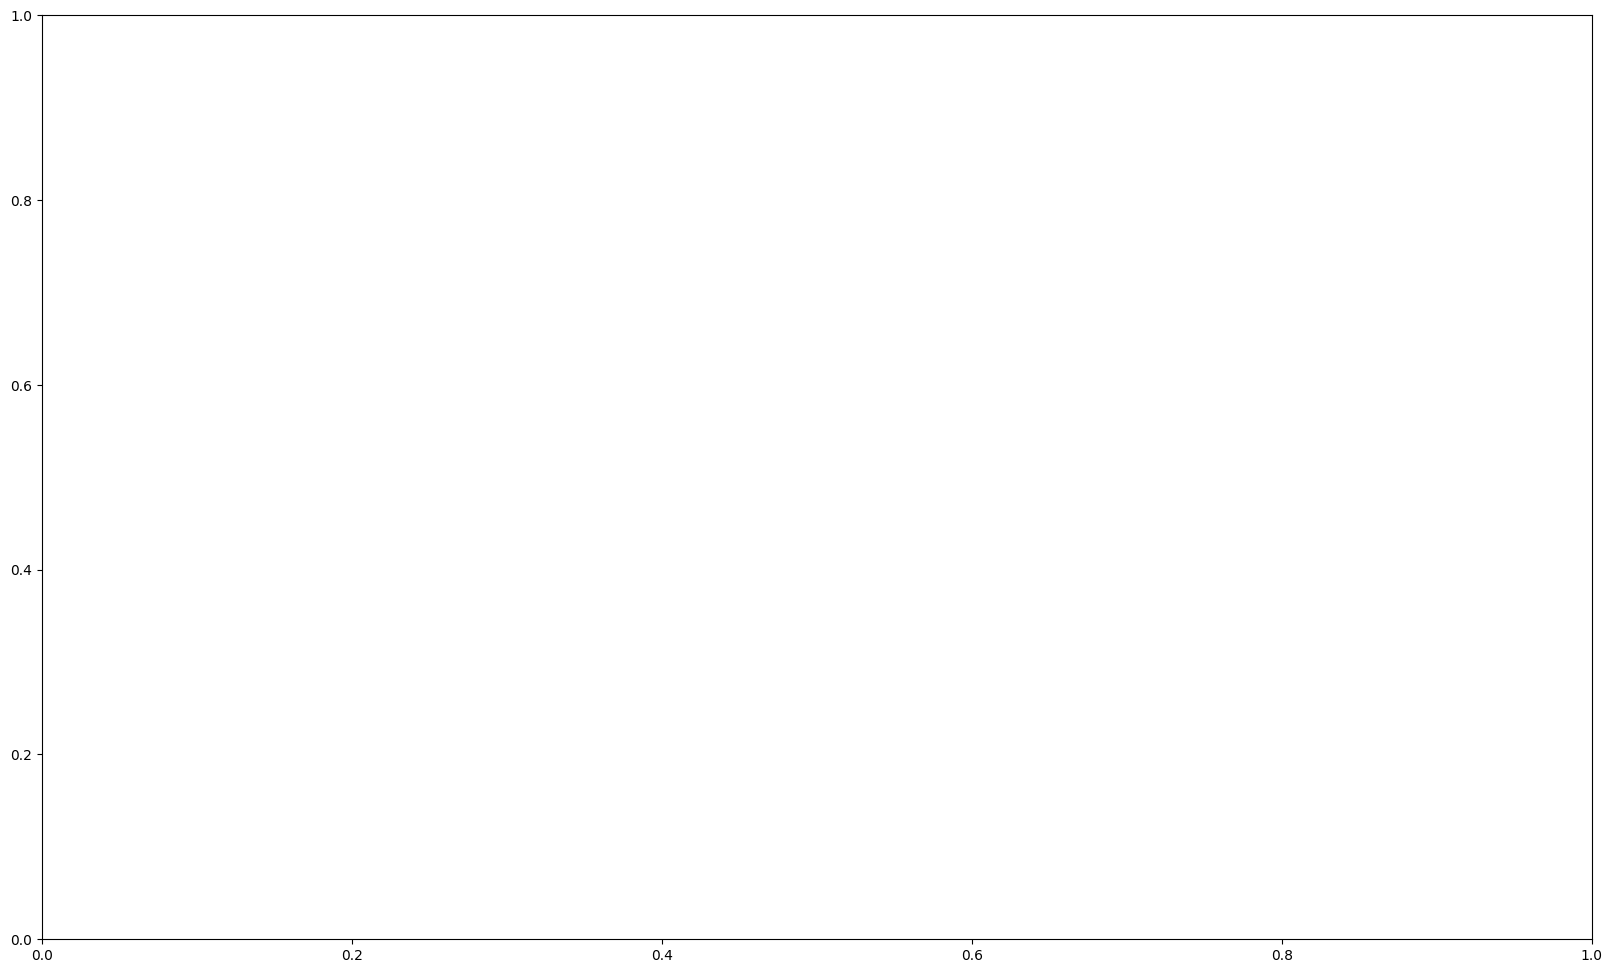

In [17]:
fig, ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(bitcoin_data.iloc[:,:-1].corr(), linewidths=1)
plt.show()

---

Throwing out columns we don't need

In [12]:
bitcoin.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Average'], dtype='object')

Resampling

In [10]:
# Daily frequency
df = bitcoin.resample('D').mean()

# Monthly frequency
df_month = bitcoin.resample('ME').mean()

# Annual frequency
df_year = bitcoin.resample('YE-DEC').mean()

# Quarterly frequency
df_Q = bitcoin.resample('QE-DEC').mean()

TypeError: agg function failed [how->mean,dtype->object]

Visualizing the prediction accuracy by the volume data available. The more data, the more precise the trend line is.

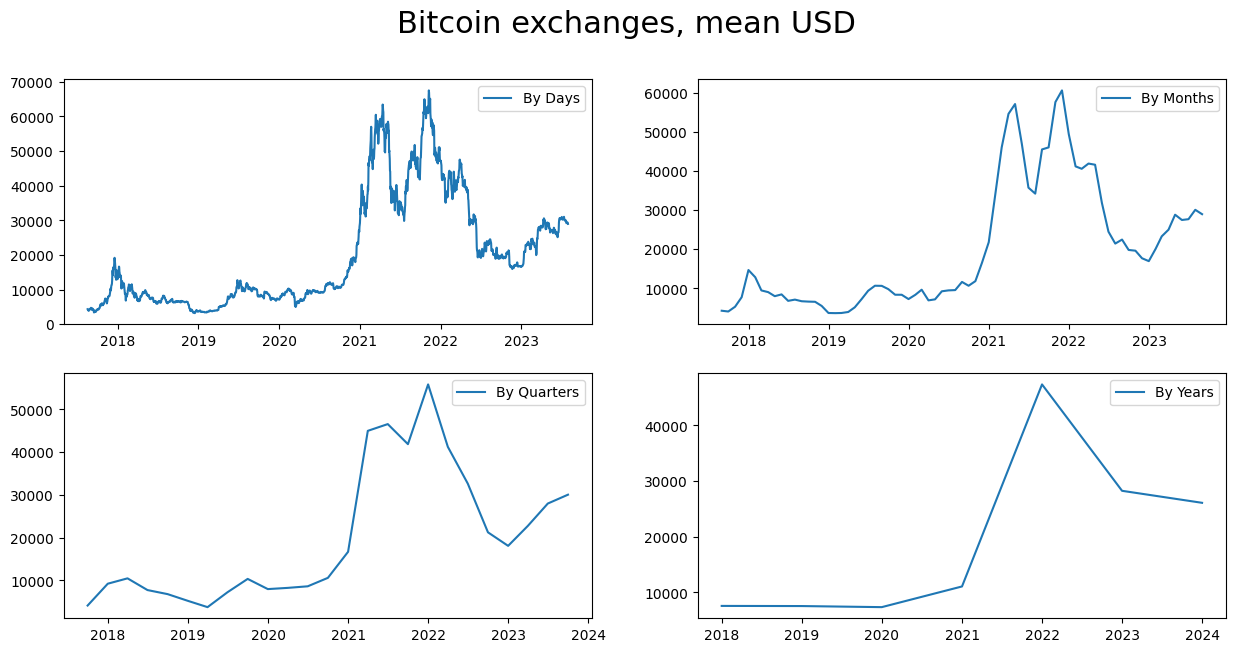

In [48]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df["open"], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month["open"], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q["open"], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year["open"], '-', label='By Years')
plt.legend()

plt.show()

In [ ]:
features = ['open', 'high', 'low', 'Volume BTC']
target = 'close'

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(bitcoin[features + [target]])